### Importing Neccessary Libraries 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding The Data

In [4]:
df= pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### You can see that the data types and the column matches. So will not be doing any change in datatype 

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Data Preparation

### Want to work with some specific columns

In [13]:
df.drop(["PassengerId",'Parch','Ticket', 'Cabin'],axis="columns",inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S


In [14]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Fare        float64
Embarked     object
dtype: object

### code that will be used to change the data types of columns without the right data type:
pd.to_numeric(column_name)
pd.to_datetime(column_name)

### Data Cleaning

In [17]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

From viewing the output of the previous code we could see that the Age and Embarked columns have null values

In [19]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Solowyse\AppData\Local\Temp\ipykernel_11376\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


Filling the age column with the mean of the that columns sinces it is a numeric column 

In [21]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    2
dtype: int64

In [22]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\Solowyse\AppData\Local\Temp\ipykernel_11376\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


Filling the Embarked columns with the mode of that column, since it is a categorical column

In [25]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [26]:
#df.isnull().sum() can also used this code to check for null values

### Detecting and Removing of outliers
Outliers can only be found in numeric columns

C:\Users\Solowyse\AppData\Local\Temp\ipykernel_11376\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

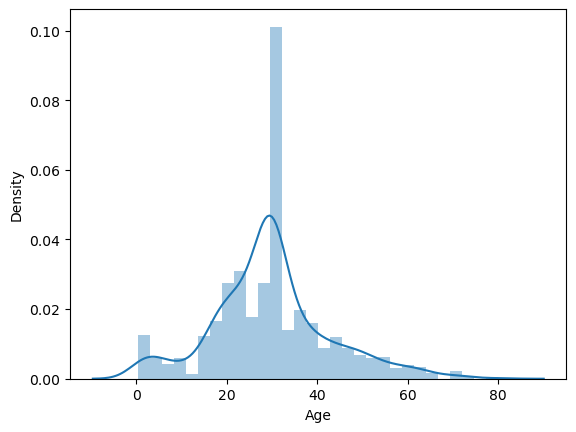

In [28]:
sns.distplot(df['Age'])

<Axes: >

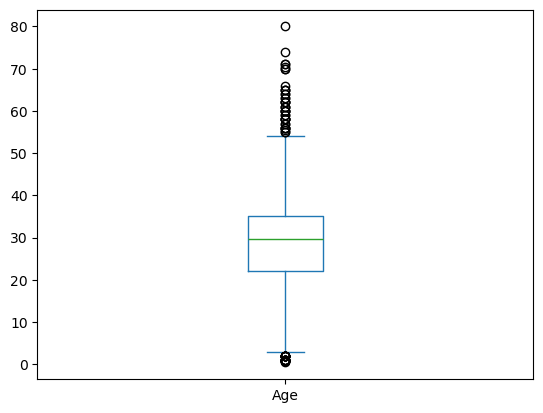

In [29]:
df['Age'].plot(kind='box')

From the visualization we can see there are outliers in the Age column that has to be remove

### Function used to remove outliers

In [32]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[((df[column] >= lower_bound) & (df[column] <= upper_bound))]

Calling the function to used in the specfic columns

In [34]:
df1=remove_outliers(df,"Age")

#### Visualization after removing the outliers

C:\Users\Solowyse\AppData\Local\Temp\ipykernel_11376\3661824417.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

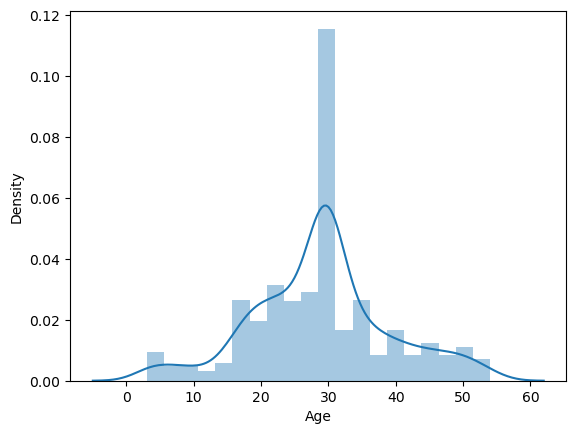

In [36]:
sns.distplot(df1['Age'])

<Axes: >

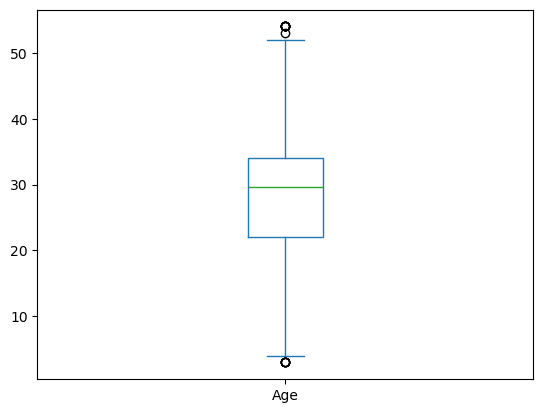

In [37]:
df1['Age'].plot(kind='box')

In [38]:
#Shape after removing outliers
df1.shape

(825, 8)

In [39]:
#Shape before removing outliers
df.shape

(891, 8)

### Checking for duplicates

In [41]:
df1.duplicated().sum()

0

we can see there is no duplicates in this dataset

In [43]:
df1.loc[df.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked


if there were to be duplicate in this dataset we used this code to view the specfic duplicate column using this code: #df.query('name'=='specific name')

In [45]:
df1.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,8.0500,S
5,0,3,"Moran, Mr. James",male,29.699118,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,51.8625,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,30.0708,C
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,16.7000,S


In [46]:
#Resetting of index
df1.reset_index(drop=True)#drop=True

,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,8.0500,S
...,...,...,...,...,...,...,...,...
820,0,2,"Montvila, Rev. Juozas",male,27.000000,0,13.0000,S
821,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,30.0000,S
822,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,23.4500,S
823,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,30.0000,C


### Gaining Insight of individual columns

In [48]:
df1['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
23.500000      1
20.500000      1
36.500000      1
14.500000      1
34.500000      1
Name: count, Length: 64, dtype: int64

In [49]:
df1['Age'].describe()

count    825.000000
mean      28.879689
std       10.182710
min        3.000000
25%       22.000000
50%       29.699118
75%       34.000000
max       54.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Number of people base on Sex')

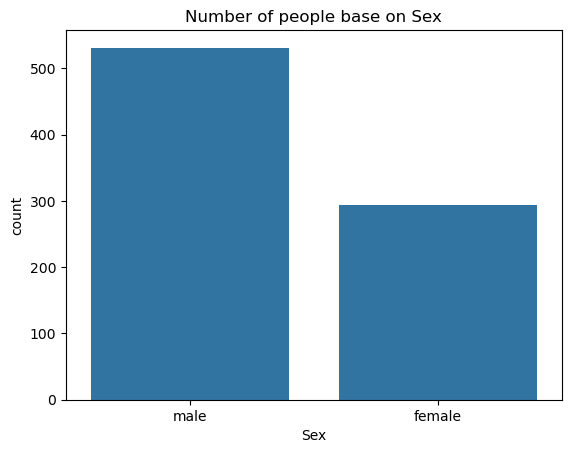

In [50]:
sns.countplot(data=df1, x="Sex")
plt.title('Number of people base on Sex')

We can see the Male are many than the female in this dataset

Text(0.5, 1.0, ' Number of people that Survive ')

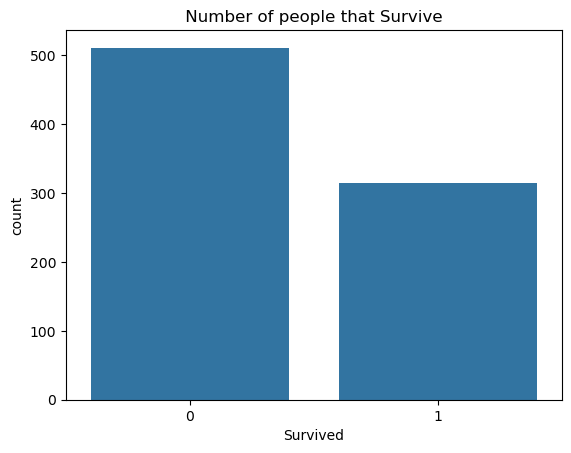

In [52]:
sns.countplot(data=df1, x="Survived")
plt.title(' Number of people that Survive ')

Also the number of people that loss their life are more than those that survived

Text(0.5, 1.0, ' Number of people that Survive base on Sex ')

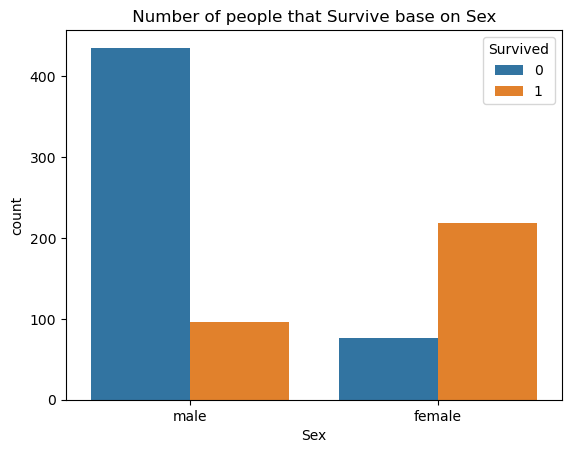

In [54]:
sns.countplot(data=df1, x="Sex",hue='Survived')
plt.title(' Number of people that Survive base on Sex ')

We can see that from the our first visualization the male were many than the female, so idealy we would be expecting the number of male to survive more than the female, but was not so. The female survive than the male

Text(0.5, 1.0, ' Sex that Purchase High Ticket ')

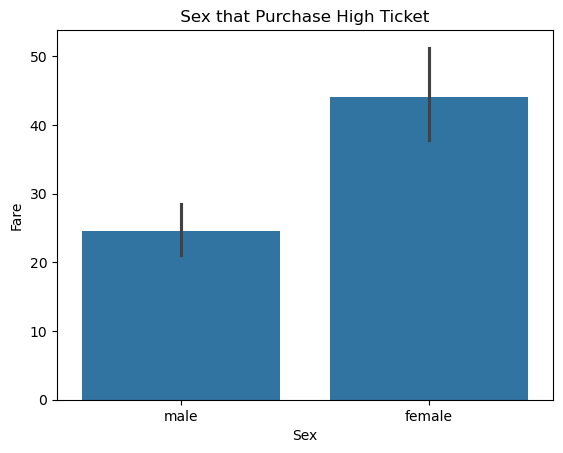

In [56]:
sns.barplot(data=df1,x='Sex',y='Fare')
plt.title(' Sex that Purchase High Ticket ')

Because we saw female surviving than male. I deciceded to check want is contributing to that, so plot the sex against the fare and saw that female were going for high fare which could influence them having high survive rate despite low number in terms of gender.The higher your fare the higher the safest place you will be given and the higher you will be treated on the plan. 